<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/581_Week3_PCA_KNN_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K Nearest Neighbour
Until now each instance has always been assigned to just one class. In some cases you may want your classifier to output multiple classes for each instance. Consider a face- recognition classifier: what should it do if it recognizes several people in the same picture? It should attach one tag per person it recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie. Then when the classifier is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple binary tags is called a multilabel classification system.
We won’t go into face recognition just yet, but let’s look at a simpler example, just for illustration purposes we will look at a Wine dataset with 3 classes (quality) 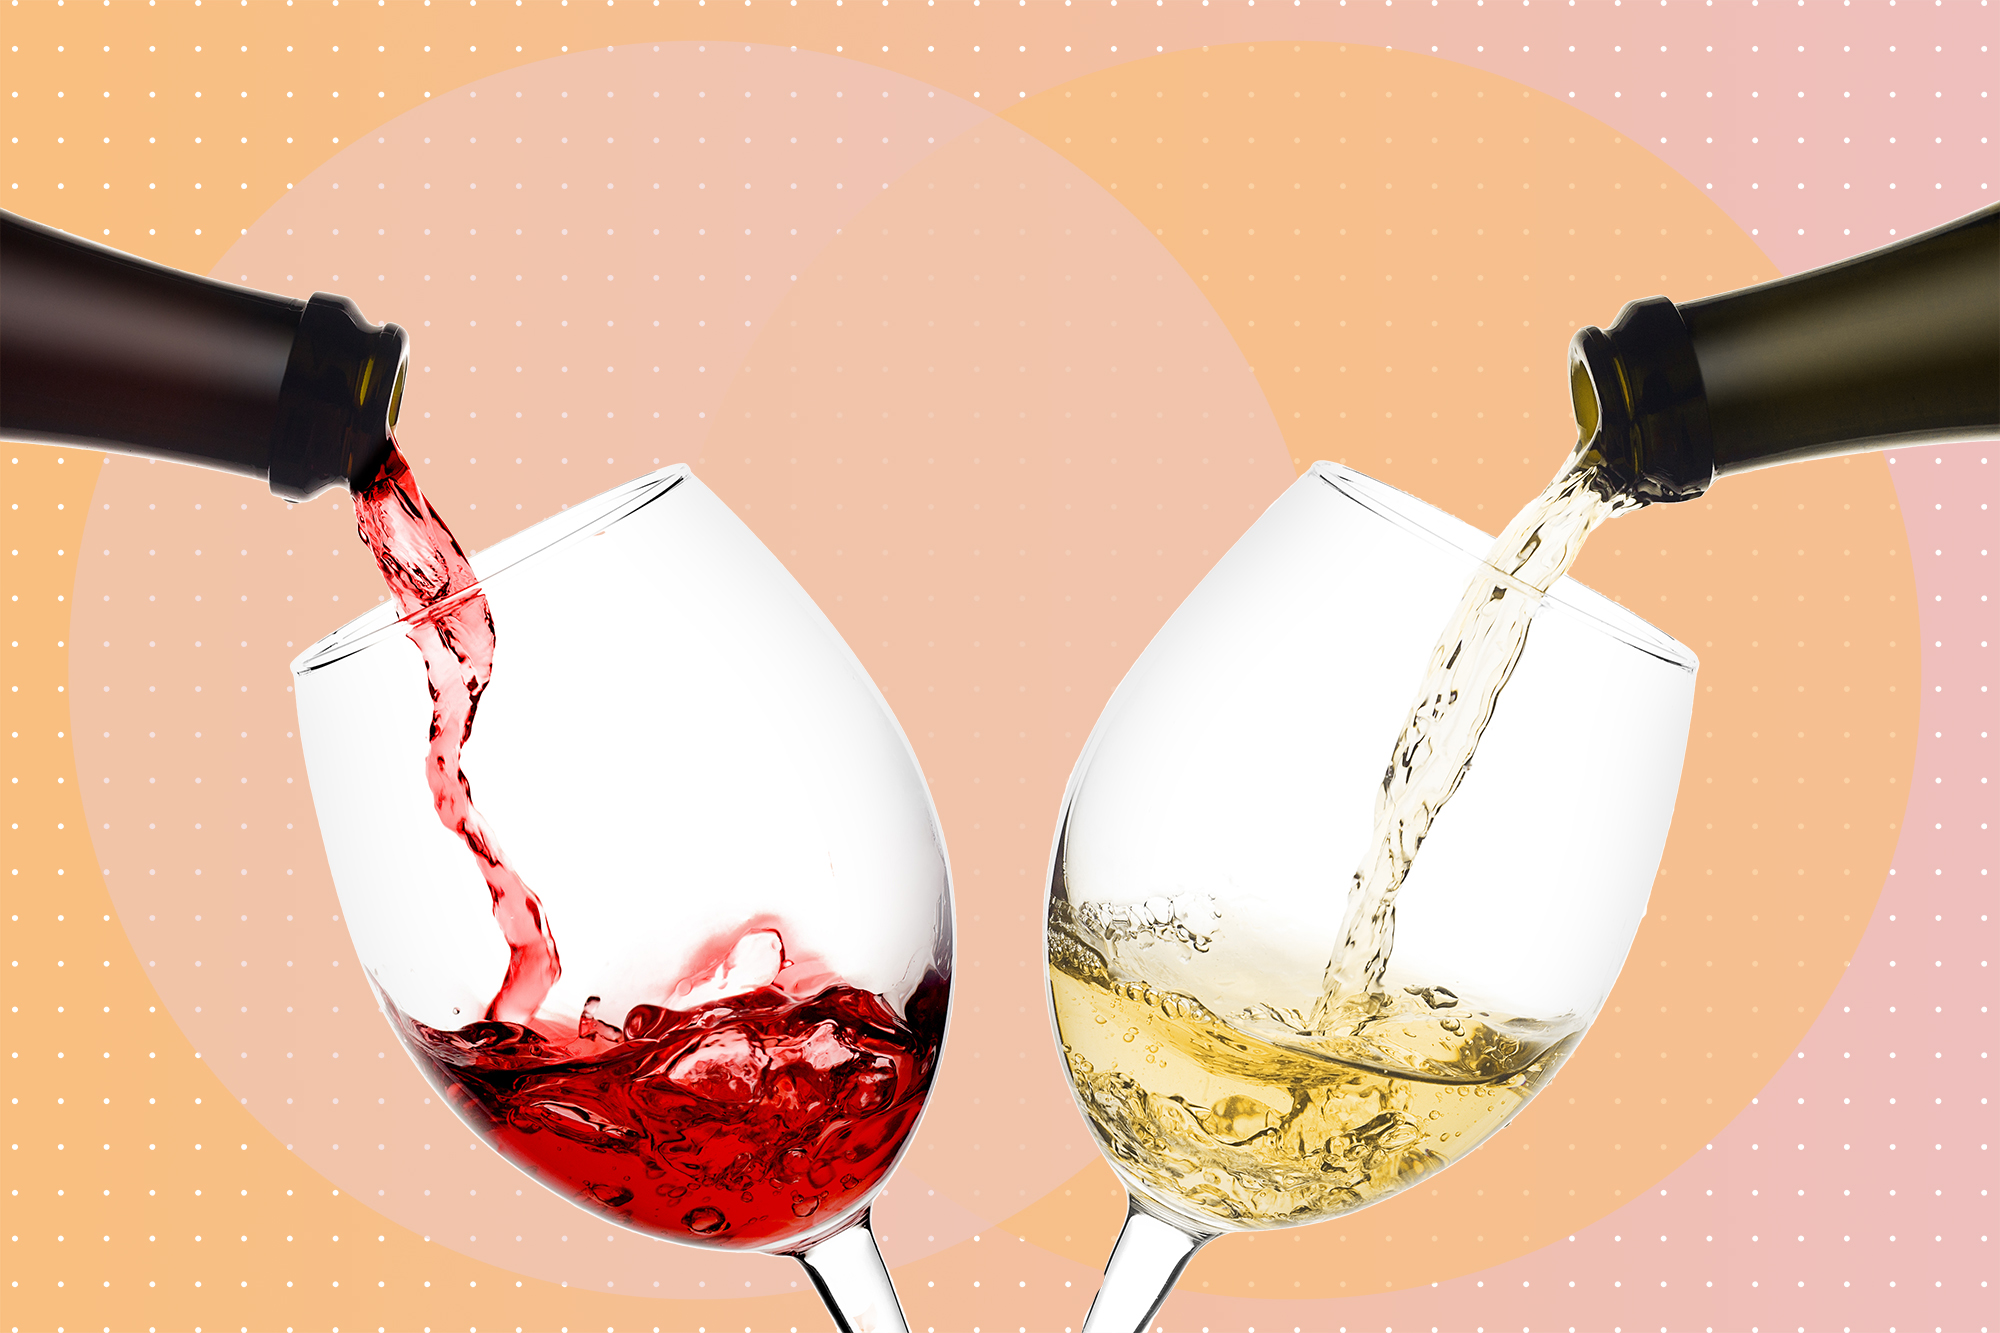

Loading Data

Let's first load the required wine dataset from scikit-learn datasets.


In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()


Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names. This dataset has already been processed and cleaned so no worries there we just want to plug it into our KNN model

In [3]:
print(wine.feature_names)
print(wine)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 

In [4]:
print(wine.target_names)
print(wine.data.shape)

['class_0' 'class_1' 'class_2']
(178, 13)


Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1) # 70% training and 30% test

In [6]:
print(y_test.shape)
print(y_train.shape)

(18,)
(160,)


In [7]:
print(X_train)

[[1.288e+01 2.990e+00 2.400e+00 ... 7.400e-01 1.420e+00 5.300e+02]
 [1.372e+01 1.430e+00 2.500e+00 ... 8.900e-01 2.870e+00 1.285e+03]
 [1.406e+01 1.630e+00 2.280e+00 ... 1.090e+00 3.710e+00 7.800e+02]
 ...
 [1.296e+01 3.450e+00 2.350e+00 ... 6.800e-01 1.750e+00 6.750e+02]
 [1.311e+01 1.900e+00 2.750e+00 ... 6.100e-01 1.330e+00 4.250e+02]
 [1.334e+01 9.400e-01 2.360e+00 ... 1.020e+00 1.930e+00 7.500e+02]]


KNN model assign labels based on the similar data points (nearest nieghbours). Variable K allows us to indicate how many nearest points should vote on the labels. If k=1 we just compare the data point to it's most similar data point and decide what label it should have based on the nearest neighbour. If K>1 then a voting is used. See pic below.

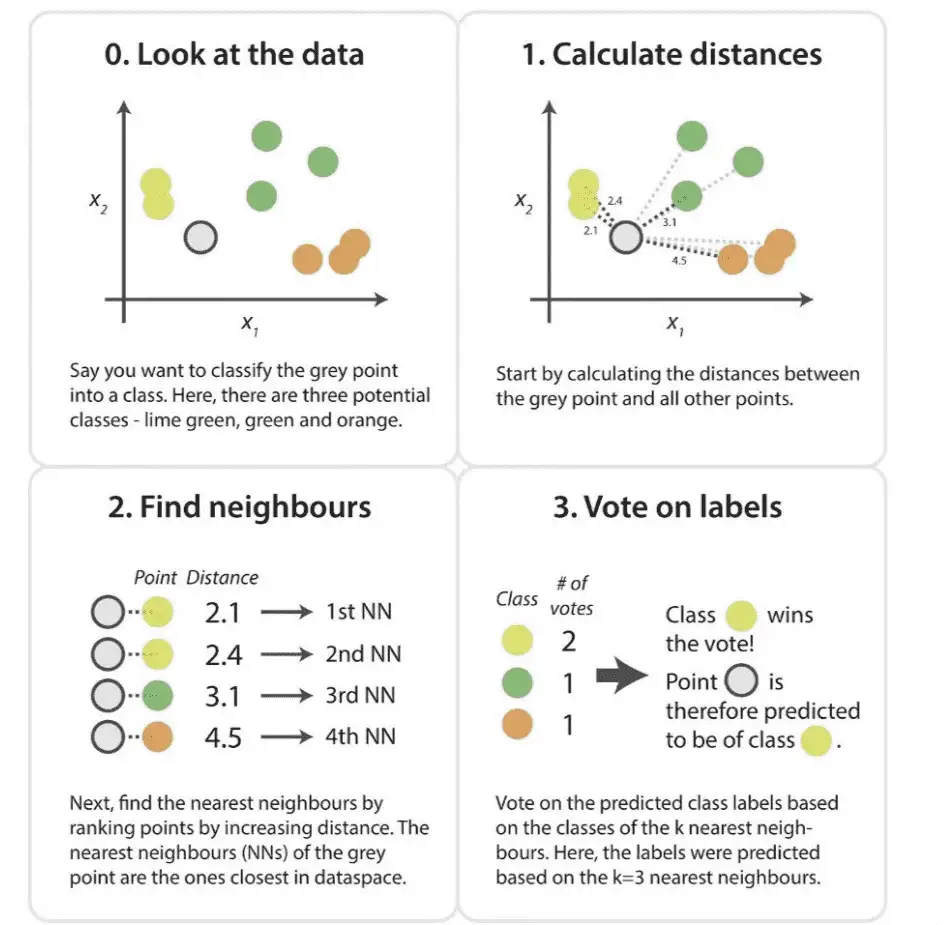



Let's build KNN classifier model for k=5.

In [29]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5) #k=5

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [9]:
print(y_pred)

[1 0 1 2 0 1 0 2 2 2 0 0 1 0 0 0 1 0]


Model Evaluation for k=5

Let's estimate, how accurately the classifier or model can predict the type of cultivars.
Accuracy can be computed by comparing actual test set values and predicted values.


In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Test data Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Train data Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Test data Accuracy: 0.6666666666666666
Train data Accuracy: 0.7625


In [56]:
import pandas as pd
df = pd.DataFrame(columns=['k_value', 'mr_train', 'mr_test'])
df


,k_value,mr_train,mr_test


In [62]:
for k in range(1,31):
  kn = KNeighborsClassifier(n_neighbors=k)
  kn.fit(X_train, y_train)
  y_pred = kn.predict(X_test)
  y_pred_train = kn.predict(X_train)
  mcs_rate_test = 1 - metrics.accuracy_score(y_test, y_pred)
  mcs_rate_train = 1 - metrics.accuracy_score(y_train, y_pred_train)
  df.loc[k-1] = [k, mcs_rate_train, mcs_rate_test]

df.head(10)

,k_value,mr_train,mr_test
0,1.0,0.00000,0.055556
1,2.0,0.14375,0.277778
2,3.0,0.14375,0.166667
3,4.0,0.20625,0.277778
4,5.0,0.23750,0.333333
5,6.0,0.24375,0.277778
6,7.0,0.25625,0.222222
7,8.0,0.23125,0.222222
8,9.0,0.23125,0.055556
9,10.0,0.25625,0.055556


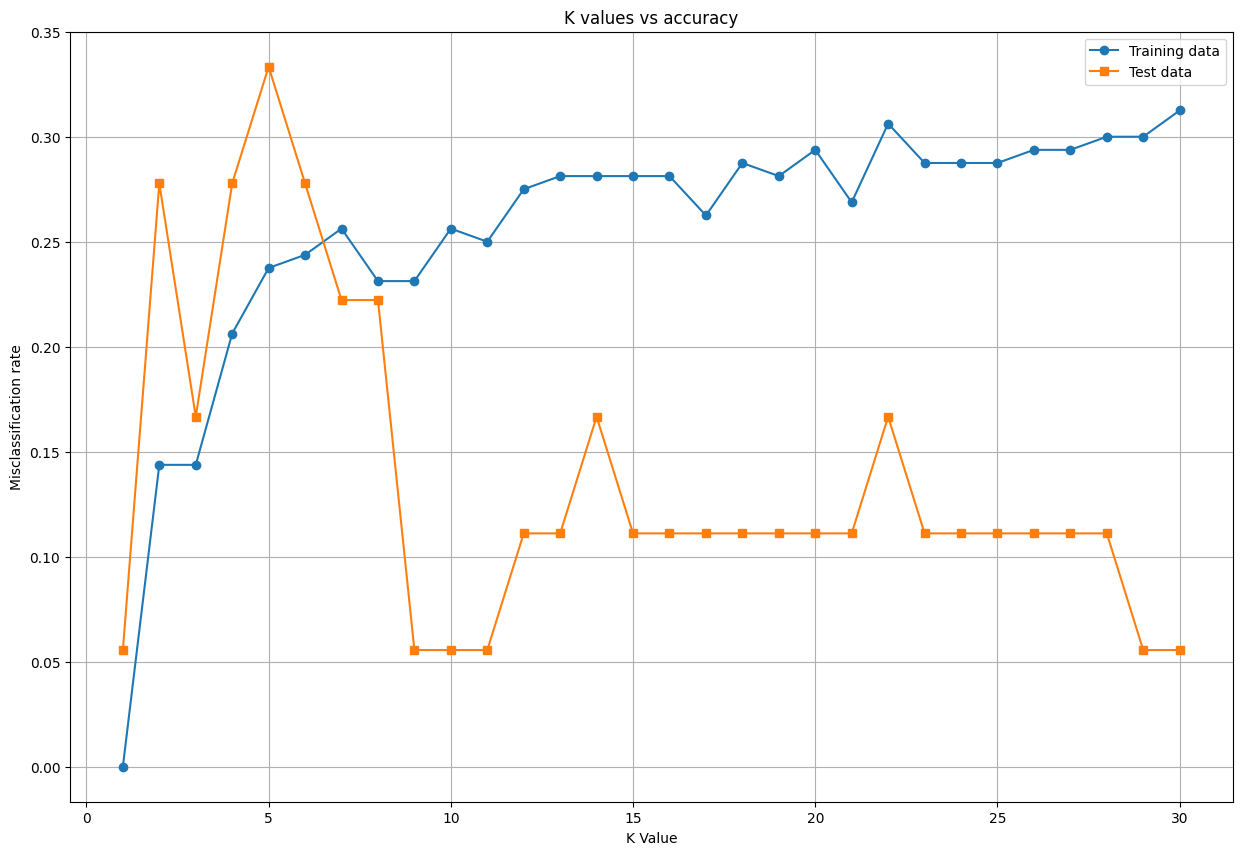

In [61]:
import matplotlib.pyplot as plt

x = df['k_value']
y1 = df['mr_train']
y2 = df['mr_test']

plt.figure(figsize=(15, 10))

# Plot the first line
plt.plot(x, y1, label='Training data', marker='o')

# Plot the second line
plt.plot(x, y2, label='Test data', marker='s')

# Add labels and a legend
plt.xlabel('K Value')
plt.ylabel('Misclassification rate')
plt.title('K values vs accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Now your turn
Based on different values of K decide what K should be so that the model does not overfit?

---



what value of K should you select
Hint plot (using paper) the following illustration:
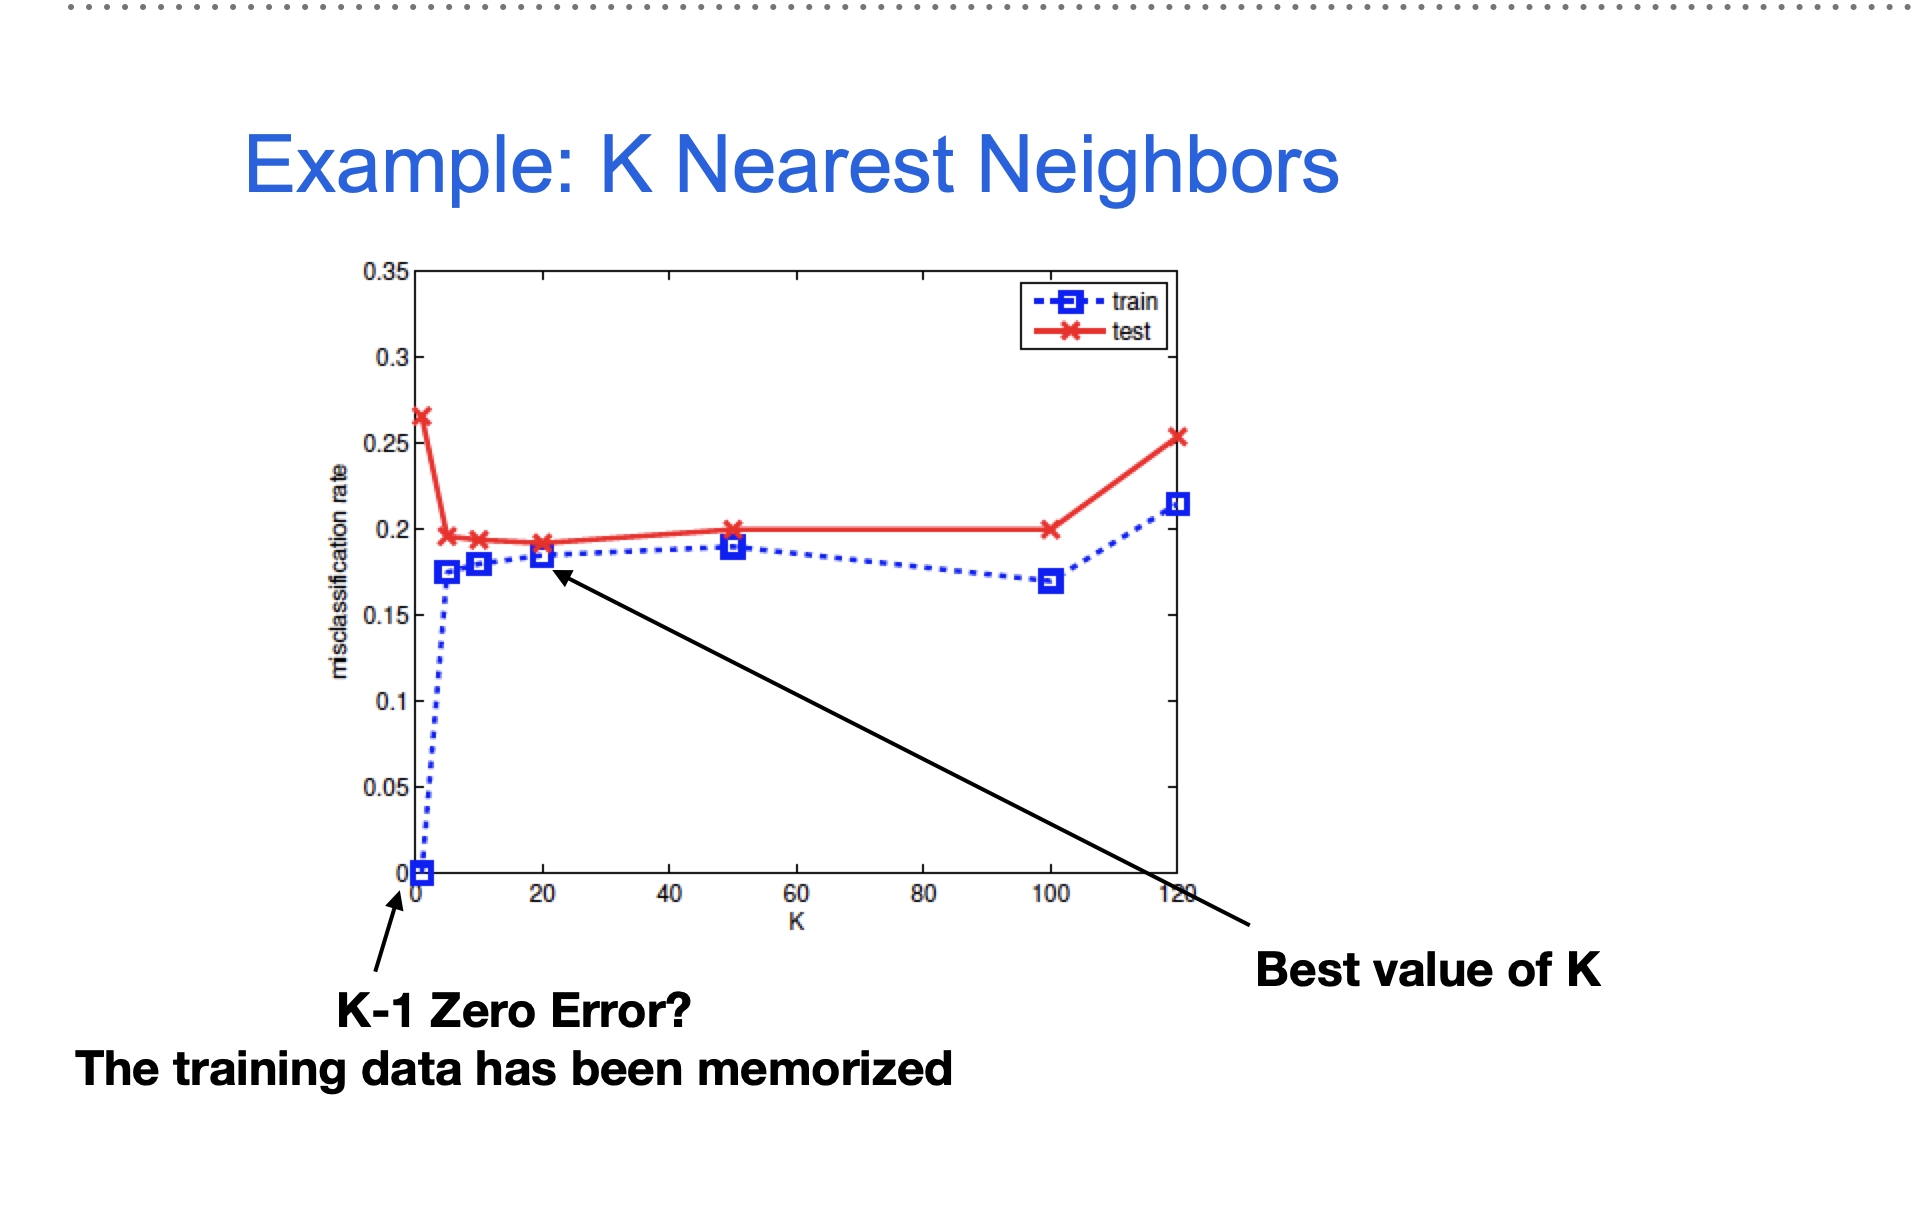